In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 1AshLTjeldDN9y3S_CSqc1BxZ7Sys9S4t
!gdown --id 15ZBarqFRrMwEoFtJbzxGozAe1VjR4z9O

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AshLTjeldDN9y3S_CSqc1BxZ7Sys9S4t
To: /content/churn-bigml-20.csv
100% 56.3k/56.3k [00:00<00:00, 37.3MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15ZBarqFRrMwEoFtJbzxGozAe1VjR4z9O
To: /content/churn-bigml-80.csv
100% 224k/224k [00:00<00:00, 24.4MB/s]


#PREDICTIVE MODELING

In [ ]:
df_20 = pd.read_csv('/content/churn-bigml-20.csv')
df_80 = pd.read_csv('/content/churn-bigml-80.csv')

In [ ]:
print('df_20: ', df_20.shape)
print('df_80: ', df_80.shape)

df_20:  (667, 20)
df_80:  (2666, 20)


In [ ]:
print('train duplicates data: ', df_80.duplicated().sum())
print('test duplicates data: ', df_20.duplicated().sum())

train duplicates data:  0
test duplicates data:  0


In [ ]:
df_20.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
df_80.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
print(df_80.info())
print(df_20.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
df_80.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [ ]:
df_80.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
#merge data train and test
df_20['source'] = 'test'
df_80['source'] = 'train'

df_all = pd.concat([df_20, df_80])

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 2665
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   float

In [ ]:
df_all['International plan'] = df_all['International plan'].map({'Yes': 1, 'No': 0})
df_all['Voice mail plan'] = df_all['Voice mail plan'].map({'Yes': 1, 'No': 0})
df_all['Churn'] = df_all['Churn'].astype(int)

df_all = pd.get_dummies(df_all, columns=['State'], drop_first=True)

In [ ]:
df_all.isna().sum()

Account length           0
Area code                0
International plan       0
Voice mail plan          0
Number vmail messages    0
                        ..
State_VT                 0
State_WA                 0
State_WI                 0
State_WV                 0
State_WY                 0
Length: 70, dtype: int64

In [ ]:
#separate data again
df_20 = df_all[df_all['source'] == 'test'].drop(columns=['source']).reset_index(drop=True)
df_80 = df_all[df_all['source'] == 'train'].drop(columns=['source']).reset_index(drop=True)

In [ ]:
#define features and target
x_train = df_80.drop(columns=['Churn'])
y_train = df_80['Churn']

x_test = df_20.drop(columns=['Churn'])
y_test = df_20['Churn']

In [ ]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0


In [ ]:
#feature scalling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#train & evaluate model
models = {
    'Logistic Regression' : LogisticRegression(max_iter=100),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier()
}

In [ ]:
for name, model in models.items():
  model.fit(x_train_scaled, y_train)
  y_pred = model.predict(x_test_scaled)
  print(f"\n Model: {name}")
  print("Accuracy :", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred))
  print("Recall   :", recall_score(y_test, y_pred))
  print("F1-Score :", f1_score(y_test, y_pred))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))


 Model: Logistic Regression
Accuracy : 0.8590704647676162
Precision: 0.5106382978723404
Recall   : 0.25263157894736843
F1-Score : 0.3380281690140845

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       572
           1       0.51      0.25      0.34        95

    accuracy                           0.86       667
   macro avg       0.70      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667


 Model: Decision Tree
Accuracy : 0.9205397301349325
Precision: 0.71
Recall   : 0.7473684210526316
F1-Score : 0.7282051282051282

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       572
           1       0.71      0.75      0.73        95

    accuracy                           0.92       667
   macro avg       0.83      0.85      0.84       667
weighted avg       0.92      0.92      0.92       667


 Model: Random For

In [ ]:
report = pd.DataFrame.from_dict(classification_report(y_test, y_pred, output_dict=True)).T

In [ ]:
results = {}

for name, model in models.items():
  model.fit(x_train_scaled, y_train)
  y_pred = model.predict(x_test_scaled)
  results[name] = {
      'accuracy': pd.DataFrame({'Accuracy': [accuracy_score(y_test, y_pred)]}),
      'precision': pd.DataFrame({'Precision': [precision_score(y_test, y_pred)]}),
      'recall': pd.DataFrame({'Recall': [recall_score(y_test, y_pred)]}),
      }


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
report.to_csv('/content/drive/MyDrive/Codveda Technologies/report.csv')

Mounted at /content/drive


In [ ]:
for name, metrics in results.items():
    metrics['accuracy'].to_csv(f'/content/drive/MyDrive/Codveda Technologies/{name}_accuracy.csv')
    metrics['precision'].to_csv(f'/content/drive/MyDrive/Codveda Technologies/{name}_pecision.csv')
    metrics['recall'].to_csv(f'/content/drive/MyDrive/Codveda Technologies/{name}_recall.csv')


In [ ]:
!gdown --id 13RKwgJHqwI0GEqsF92WWFcE0VOevpsTT

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13RKwgJHqwI0GEqsF92WWFcE0VOevpsTT
To: /content/3) Sentiment dataset.csv
100% 171k/171k [00:00<00:00, 12.5MB/s]


#SENTIMENT ANALYSIS

In [ ]:
df_sentiment = pd.read_csv('/content/3) Sentiment dataset.csv')
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [ ]:
print('duplicates: ', df_sentiment.duplicated().sum())

duplicates:  0


In [ ]:
df_sentiment.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [ ]:
df_sentiment.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                  15.0   30.0     USA         
1   #Traffic #Morning                               5.0   10.0     Canada      
2   #Fitness #Workout                              20.0   40.0   USA           
3   #Travel #Adventure                              8.0   15.0     UK          
4   #Cooking #Food                                 12.0   25.0    Australia    

   Year  Month  Day  Hour  
0  2023      1   15    12  
1  2023      1   15     8  
2  2023      1   15    15  
3  2023      1   15    18  
4  2023      1   15    19

In [ ]:
df_sentiment['Retweets'].describe()

count    732.000000
mean      21.508197
std        7.061286
min        5.000000
25%       17.750000
50%       22.000000
75%       25.000000
max       40.000000
Name: Retweets, dtype: float64

In [ ]:
df_sentiment['Timestamp'] = pd.to_datetime(df_sentiment['Timestamp'])

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
def preproeces_text(text):
  tokens = word_tokenize(text.lower())
  filtered_tokens =[token for token in tokens if token not in stopwords.words('english')]
  lemmatizer = WordNetLemmatizer()
  lemmatized = [lemmatizer.lemmatize(tokens) for tokens in filtered_tokens]
  return ' '.join(lemmatized)

df_sentiment['Text'] = df_sentiment['Text'].apply(preproeces_text)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
  score = analyzer.polarity_scores(text)
  compound_score = score['compound']
  if compound_score >= 0.05 :
    sentiment = 'Positive'
  elif compound_score <= -0.05:
    sentiment = 'Negative'
  else:
    sentiment = 'Neutral'
  return sentiment


df_sentiment['sentiment'] = df_sentiment['Text'].apply(get_sentiment_score)

we use standard scoring metrics followed by most of the analyzer

Positive sentiment: compound score >= 0.05

Neutral sentiment: (compound score > -0.05) and (compound score < 0.05)

Negative sentiment: compound score <= -0.05

<ipython-input-36-5f155ac5ba4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


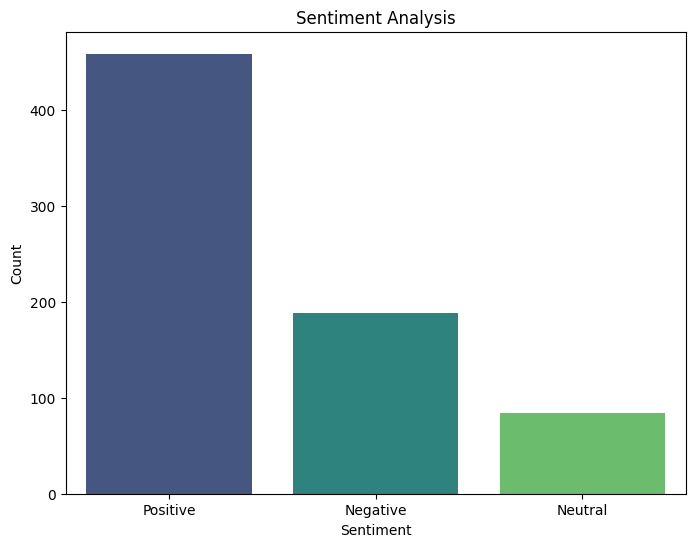

In [ ]:
sentiment_counts = df_sentiment['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

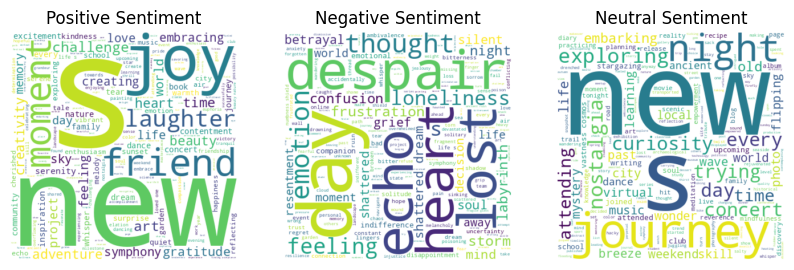

In [ ]:
from wordcloud import WordCloud
positive = WordCloud(width=400, height=400, background_color='white').generate(' '.join(df_sentiment[df_sentiment['sentiment'] == 'Positive']['Text']))
negative = WordCloud(width=400, height=400, background_color='white').generate(' '.join(df_sentiment[df_sentiment['sentiment'] == 'Negative']['Text']))
nautal = WordCloud(width=400, height=400, background_color='white').generate(' '.join(df_sentiment[df_sentiment['sentiment'] == 'Neutral']['Text']))

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(nautal, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')
plt.show()

In [ ]:
df_sentiment.to_csv('/content/drive/MyDrive/Codveda Technologies/sentiment.csv')

In [ ]:
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['sentiment', 'count']
sentiment_counts_df.to_csv('/content/drive/MyDrive/Codveda Technologies/sentiment_counts.csv', index=False)